<a href="https://colab.research.google.com/github/menaenahoro/House_Prediction/blob/main/HPFUML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# sns.set_style("whitegrid")
# plt.style.use("fivethirtyeight")


##Loading the *Data*

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Side G/house-prices-advanced-regression-techniques (1)/train.csv")

## *Exploratory Data Analysis (EDA)*

In [3]:
df.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

*checking the shape of the data (showing total rows; 1460 and columns; 81)*

In [4]:
df.shape

(1460, 81)

*Getting information about the data types (Dtype) and checking the number of missing values (Non-Null Count)in each column*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

*Statistical Summary*

In [6]:
df.describe().T

count           mean  ...        75%       max
Id             1460.0     730.500000  ...    1095.25    1460.0
MSSubClass     1460.0      56.897260  ...      70.00     190.0
LotFrontage    1201.0      70.049958  ...      80.00     313.0
LotArea        1460.0   10516.828082  ...   11601.50  215245.0
OverallQual    1460.0       6.099315  ...       7.00      10.0
OverallCond    1460.0       5.575342  ...       6.00       9.0
YearBuilt      1460.0    1971.267808  ...    2000.00    2010.0
YearRemodAdd   1460.0    1984.865753  ...    2004.00    2010.0
MasVnrArea     1452.0     103.685262  ...     166.00    1600.0
BsmtFinSF1     1460.0     443.639726  ...     712.25    5644.0
BsmtFinSF2     1460.0      46.549315  ...       0.00    1474.0
BsmtUnfSF      1460.0     567.240411  ...     808.00    2336.0
TotalBsmtSF    1460.0    1057.429452  ...    1298.25    6110.0
1stFlrSF       1460.0    1162.626712  ...    1391.25    4692.0
2ndFlrSF       1460.0     346.992466  ...     728.00    2065.0
LowQualFinSF   1460.0       5.844521  ...       0.00     572.0
GrLivArea      1460.0    1515.463699  ...    1776.75    5642.0
BsmtFullBath   1460.0       0.425342  ...       1.00       3.0
BsmtHalfBath   1460.0       0.057534  ...       0.00       2.0
FullBath       1460.0       1.565068  ...       2.00       3.0
HalfBath       1460.0       0.382877  ...       1.00       2.0
BedroomAbvGr   1460.0       2.866438  ...       3.00       8.0
KitchenAbvGr   1460.0       1.046575  ...       1.00       3.0
TotRmsAbvGrd   1460.0       6.517808  ...       7.00      14.0
Fireplaces     1460.0       0.613014  ...       1.00       3.0
GarageYrBlt    1379.0    1978.506164  ...    2002.00    2010.0
GarageCars     1460.0       1.767123  ...       2.00       4.0
GarageArea     1460.0     472.980137  ...     576.00    1418.0
WoodDeckSF     1460.0      94.244521  ...     168.00     857.0
OpenPorchSF    1460.0      46.660274  ...      68.00     547.0
EnclosedPorch  1460.0      21.954110  ...       0.00     552.0
3SsnPorch      1460.0       3.409589  ...       0.00     508.0
ScreenPorch    1460.0      15.060959  ...       0.00     480.0
PoolArea       1460.0       2.758904  ...       0.00     738.0
MiscVal        1460.0      43.489041  ...       0.00   15500.0
MoSold         1460.0       6.321918  ...       8.00      12.0
YrSold         1460.0    2007.815753  ...    2009.00    2010.0
SalePrice      1460.0  180921.195890  ...  214000.00  755000.0

[38 rows x 8 columns]

*Using a heatmap to visualise the correlation between each numerical columns*

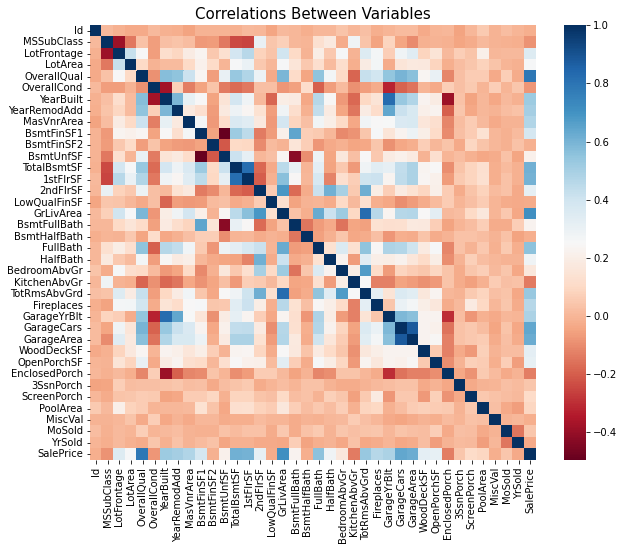

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()


In [8]:
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
del df2['Id']
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

List of dropped columns: Id, Alley, PoolQC, Fence, MiscFeature, 



*Now* lets take a look at how the housing price is distributed

In [9]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.6});

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<font color='chocolate'>With this information we can see that the prices are skewed right and some outliers lies above ~500,000. We will eventually want to get rid of the them to get a normal distribution of the independent variable (`SalePrice`) for machine learning.</font>

In [10]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [11]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

MSSubClass  LotFrontage  LotArea  ...  MoSold  YrSold  SalePrice
0          60         65.0     8450  ...       2    2008     208500
1          20         80.0     9600  ...       5    2007     181500
2          60         68.0    11250  ...       9    2008     223500
3          70         60.0     9550  ...       2    2006     140000
4          60         84.0    14260  ...      12    2008     250000

[5 rows x 37 columns]

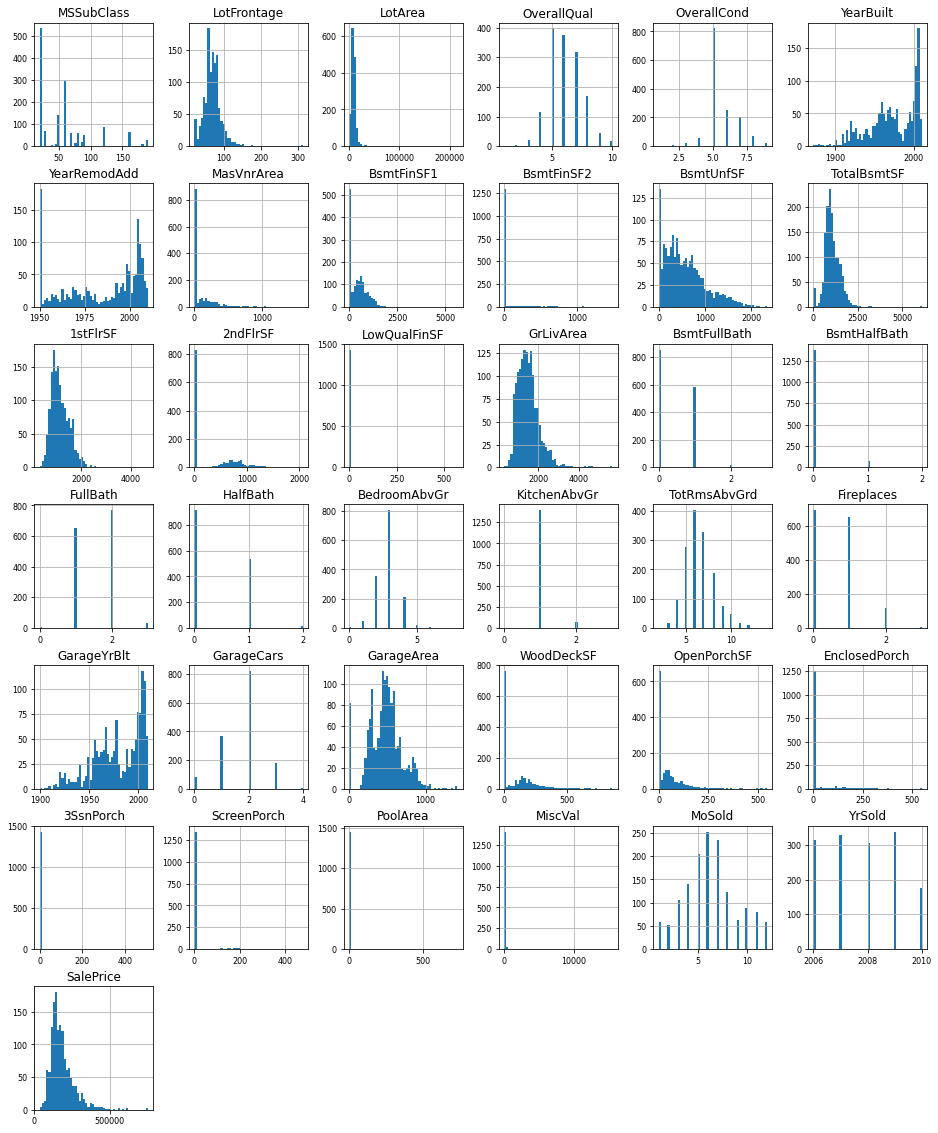

In [12]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

After visualizing some columns need to be dropped

In [13]:
df.drop(['MiscVal' , 'PoolArea', 'ScreenPorch', '3SsnPorch' , 'KitchenAbvGr' , 'BsmtFinSF2', 'BsmtHalfBath' , 'LowQualFinSF', 'EnclosedPorch' ,'MoSold'], axis=1 ,inplace= True )


CORRELATION

In [14]:
df_num_corr = df_num.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.6].sort_values(ascending=False)
print("There is {} not so strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 6 not so strongly correlated values with SalePrice:
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
Name: SalePrice, dtype: float64


Avoiding overfitting when training a machine learning model is necessary hence we are taking not so strongly correlated features. We now have a list of correlated values but this list is incomplete as we know that correlation is affected by outliers. So we could proceed as follow:

- Plot the numerical features and see which ones have very few or explainable outliers
- Remove the outliers from these features and see which one can have a good correlation without their outliers
    
Btw, correlation by itself does not always explain the relationship between data so ploting them could even lead us to new insights and in the same manner, check that our correlated values have a linear relationship to the `SalePrice`. 

For example, relationships such as curvilinear relationship cannot be guessed just by looking at the correlation value so lets take the features we excluded from our correlation table and plot them to see if they show some kind of pattern.

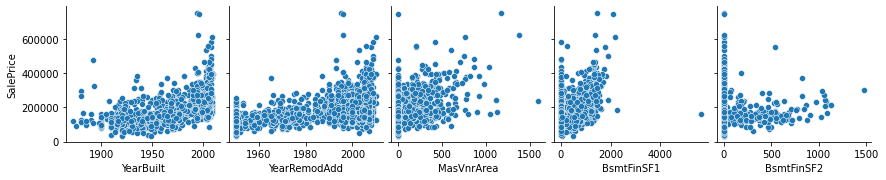

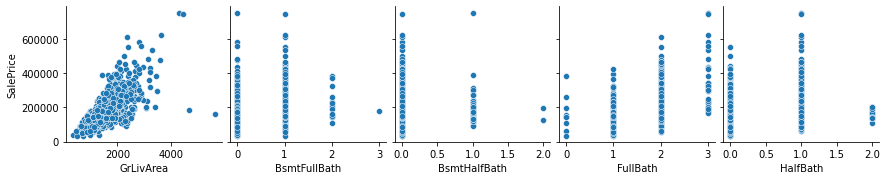

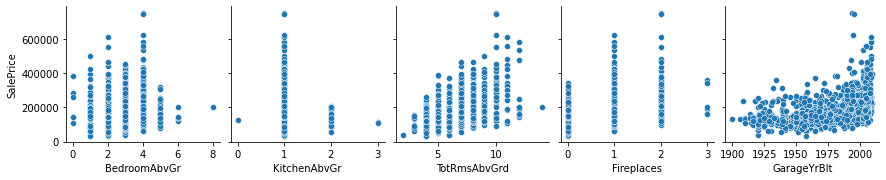

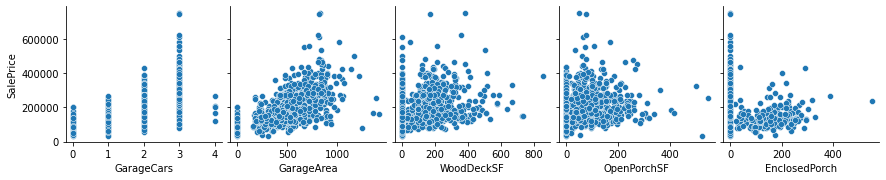

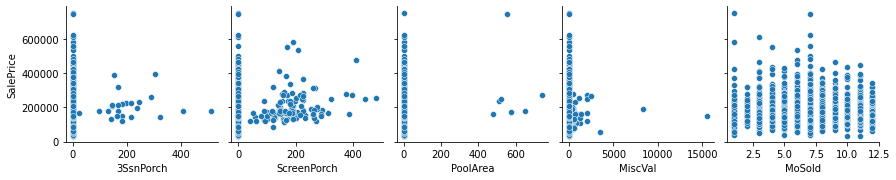

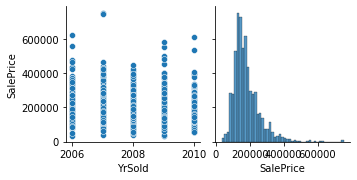

In [15]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])

 We can clearly identify some relationships. Most of them seems to have a linear relationship with the `SalePrice` and if we look closely at the data we can see that a lot of data points are located on `x = 0` which may indicate the absence of such feature in the house.

Take `OpenPorchSF`, I doubt that all houses have a porch (mine doesn't for instance but I don't lose hope that one day... yeah one day...).

In [16]:
golden_features_list1 = golden_features_list.index
golden_features_list1

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF'],
      dtype='object')

In [18]:
features_to_analyse = [x for x in golden_features_list1]
features_to_analyse.append('SalePrice')
features_to_analyse

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'SalePrice']

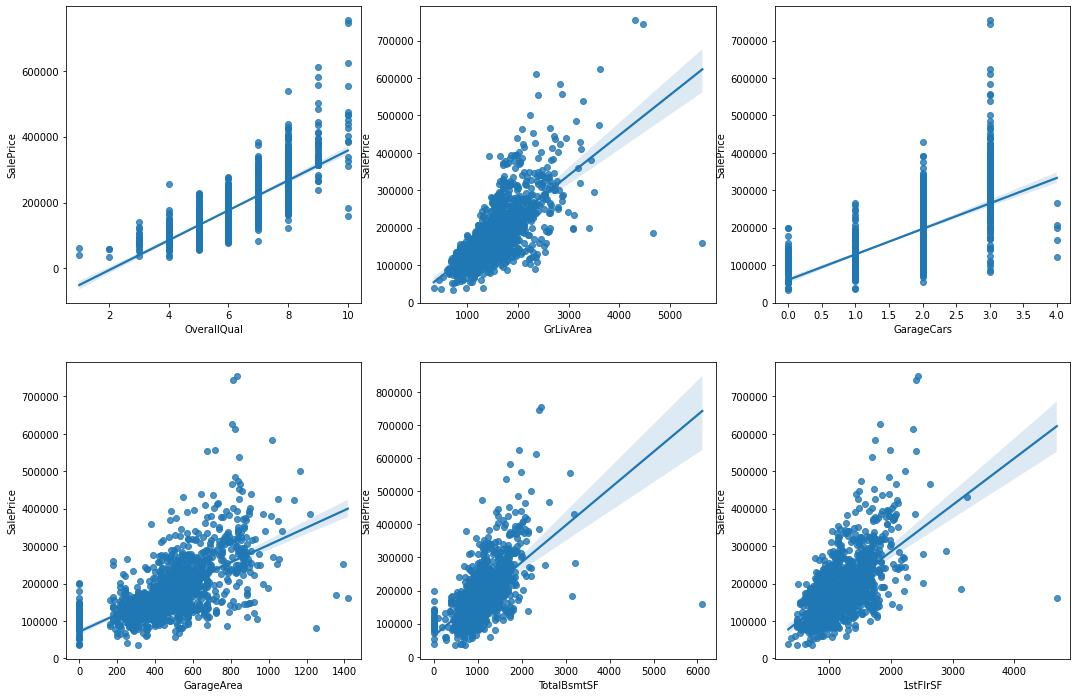

In [19]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='SalePrice', data=df[features_to_analyse], ax=ax)

Categorical Features

In [20]:
df_not_num = df.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 39 non numerical features including:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [21]:
df_not_num.head()

MSZoning Street LotShape  ... PavedDrive SaleType SaleCondition
0       RL   Pave      Reg  ...          Y       WD        Normal
1       RL   Pave      Reg  ...          Y       WD        Normal
2       RL   Pave      IR1  ...          Y       WD        Normal
3       RL   Pave      IR1  ...          Y       WD       Abnorml
4       RL   Pave      IR1  ...          Y       WD        Normal

[5 rows x 39 columns]

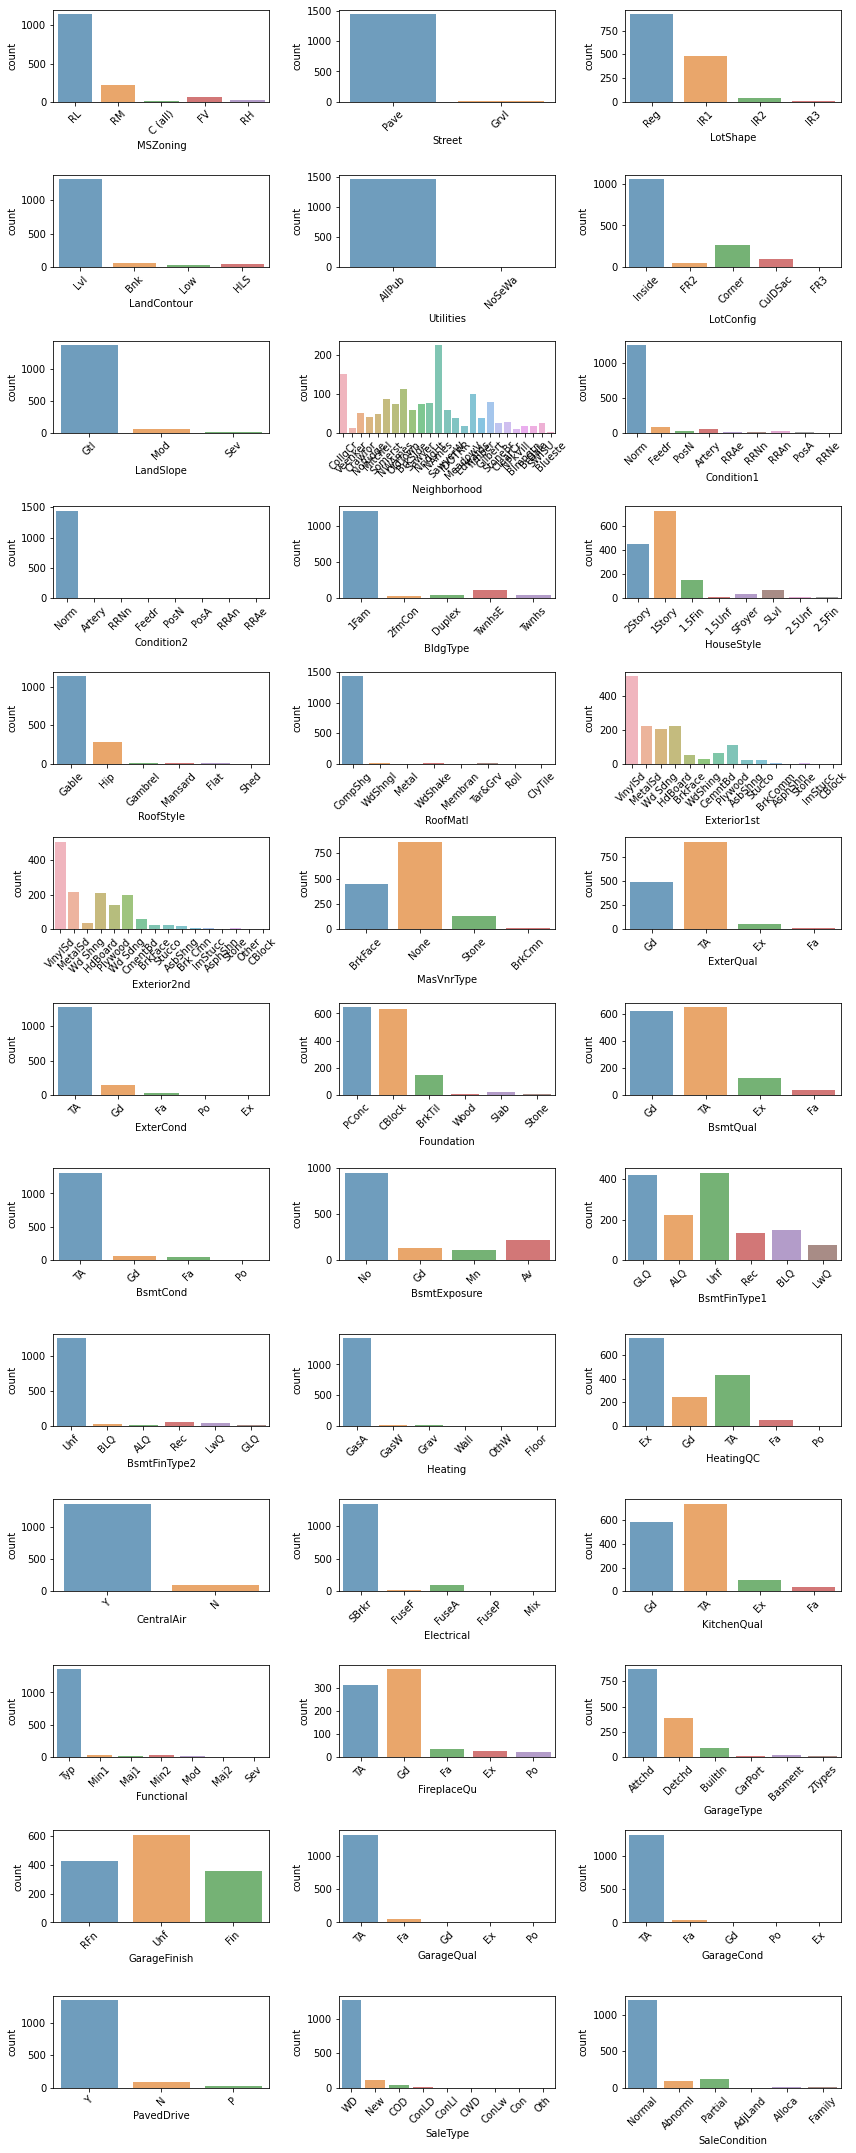

In [22]:
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()

We can see that some categories are predominant for some features such as `Utilities`, `Heating`, `GarageCond`, `Functional`... These features may not be relevant for our predictive model

In [23]:
features_to_analyse

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'SalePrice']

In [24]:
data = df[features_to_analyse]
data.head()

OverallQual  GrLivArea  GarageCars  ...  TotalBsmtSF  1stFlrSF  SalePrice
0            7       1710           2  ...          856       856     208500
1            6       1262           2  ...         1262      1262     181500
2            7       1786           2  ...          920       920     223500
3            7       1717           3  ...          756       961     140000
4            8       2198           3  ...         1145      1145     250000

[5 rows x 7 columns]

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1460 non-null   int64
 1   GrLivArea    1460 non-null   int64
 2   GarageCars   1460 non-null   int64
 3   GarageArea   1460 non-null   int64
 4   TotalBsmtSF  1460 non-null   int64
 5   1stFlrSF     1460 non-null   int64
 6   SalePrice    1460 non-null   int64
dtypes: int64(7)
memory usage: 80.0 KB


In [26]:
data = data.fillna(0)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
import xgboost as xgb


In [28]:
lin_model = LinearRegression()
DT_model = DecisionTreeRegressor()
ridge_model = Ridge(random_state=123)
rf = RandomForestRegressor(random_state=123)
ada_boost = AdaBoostRegressor(random_state=123)
svr = SVR()
xgb = xgb.XGBRegressor(random_state=123)

models = {
    "lin_model": lin_model,
    "DT_model": DT_model,
    "ridge_model": ridge_model,
    "rf_model": rf,
    "ada_boost": ada_boost,
    "svr": svr,
    "xgb": xgb
}

In [29]:
def train_model(models: dict) -> pd.DataFrame:
    my_dict = {}
    name_list, r_sqd_list, mae_list, rmse_list = [], [], [], []
    for name, estimator in models.items():
        
        estimator.fit(X_train, y_train)

        
        y_pred = estimator.predict(X_test)

        
        r_sqd = metrics.r2_score(y_test, y_pred)
        mae = metrics.mean_absolute_error(y_test, y_pred)
        mse = metrics.mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        
        name_list.append(name)
        r_sqd_list.append(r_sqd)
        mae_list.append(mae)
        rmse_list.append(rmse)

    my_dict["Name"] = name_list
    my_dict["R_squared"] = r_sqd_list
    my_dict["Mean_absolute_error"] = mae_list
    my_dict["Root_mean_sqd_error"] = rmse_list

    my_df = pd.DataFrame(my_dict)
    my_df = my_df.sort_values("Root_mean_sqd_error")
    return my_df

In [30]:
X = data.iloc[:, :].values
Y = data.iloc[:, 1].values
print(X)

[[     7   1710      2 ...    856    856 208500]
 [     6   1262      2 ...   1262   1262 181500]
 [     7   1786      2 ...    920    920 223500]
 ...
 [     7   2340      1 ...   1152   1188 266500]
 [     5   1078      1 ...   1078   1078 142125]
 [     5   1256      1 ...   1256   1256 147500]]


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=123
)

In [32]:
train_model(models)

[14:09:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Name  R_squared  Mean_absolute_error  Root_mean_sqd_error
0    lin_model   1.000000         6.811243e-12         8.520466e-12
2  ridge_model   1.000000         1.894068e-06         2.225906e-06
3     rf_model   0.999554         2.264658e+00         1.009989e+01
6          xgb   0.999451         4.593860e+00         1.119751e+01
1     DT_model   0.999427         2.868493e+00         1.144097e+01
4    ada_boost   0.988795         3.876657e+01         5.059667e+01
5          svr   0.202884         3.236413e+02         4.267563e+02

In [33]:
import pickle

model = {}
model["lin_model"] = lin_model

with open("./drive/My Drive/Side G/lin_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [34]:
model = {}
model["DT_model"] = DT_model

with open("./drive/My Drive/Side G/DT_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [35]:
model = {}

model["ridge_model"] = ridge_model

with open("./drive/My Drive/Side G/ridge_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [36]:
model = {}

model["rf_model"] = rf

with open("./drive/My Drive/Side G/rf_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [37]:
model = {}

model["ada_boost"] = ada_boost

with open("./drive/My Drive/Side G/ada_boost.pkl", "wb") as f:
    pickle.dump(model, f)

In [38]:
model = {}

model["svr"] = svr

with open("./drive/My Drive/Side G/svr.pkl", "wb") as f:
    pickle.dump(model, f)

In [39]:
model = {}
model["xgb"] = xgb

with open("./drive/My Drive/Side G/xgb.pkl", "wb") as f:
    pickle.dump(model, f)